In [27]:
# Import Dependencies/liabraries
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import pandas as pd

In [28]:
# Load  & Read in csv
city_data_df = pd.read_csv("raw_data/city_data.csv")
ride_data_df = pd.read_csv("raw_data/ride_data.csv")

In [29]:
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [30]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [31]:
# Merge our two data frames together into one.
combined_ridesharing_df = pd.merge(city_data_df, ride_data_df, on="city", how = "outer").sort_values("city")

#combined_ridesharing_data.columns
combined_ridesharing_df.head()

,city,driver_count,type,date,fare,ride_id
1594,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1595,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
1624,Alvarezhaven,21,Urban,2016-07-04 04:28:22,33.31,306054352684
1623,Alvarezhaven,21,Urban,2016-01-27 10:38:40,6.72,6152998520191
1622,Alvarezhaven,21,Urban,2016-05-16 15:33:14,6.45,8939751998750


# Bubble Plot of Pyber Ride Sharing Data

In [32]:
#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

def pyber_ride ():
    # Retrieve Untique school id
    city_group_df=combined_ridesharing_df["city"].unique()
    
    # create an empty list
    city_list=[]
    
    # Per city values
    for city in city_group_df:
        
        # All information retreived based from merged df(combined_ridesharing_df)per city
        city_g_df = combined_ridesharing_df[combined_ridesharing_df["city"] == city]
        
        # retreive the required details
        total_ride=city_g_df["ride_id"].count()
        city_type=city_g_df["type"].unique()[0]
        driver_count=city_g_df["driver_count"].unique()[0]        
        avg_fare=city_g_df["fare"].sum()/total_ride
        
        #append details to list
        city_list.append([city,total_ride,city_type,driver_count,avg_fare])
        
    #create df using list and return    
    city_total=pd.DataFrame(city_list,columns=['City','Total Ride','Type','Driver Count','Fare Per City'])
    return city_total

In [33]:
#Summary  Per City
Total_Sum = pyber_ride()
Total_Sum.head()

,City,Total Ride,Type,Driver Count,Fare Per City
0,Alvarezhaven,31,Urban,21,23.928710
1,Alyssaberg,26,Urban,67,20.609615
2,Anitamouth,9,Suburban,16,37.315556
3,Antoniomouth,22,Urban,21,23.625000
4,Aprilchester,19,Urban,49,21.981579


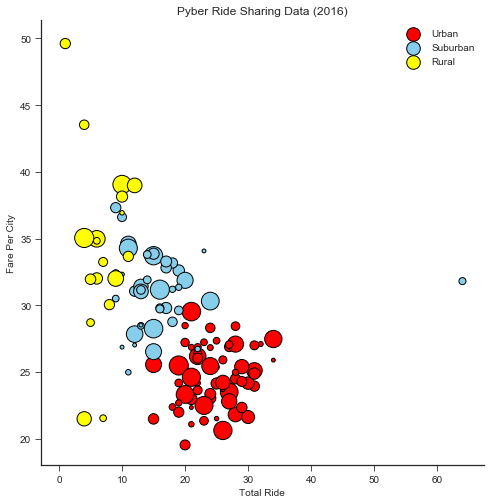

In [35]:
#a Bubble Plot that showcases the relationship between four key variables.

#fig,ax=plt.subplots()
#set style for seaborn graph grid
sns.set_style("ticks")
#set size for the markers in correlation with driver count for each city
test = [i*5  for i in Total_Sum["Driver Count"]]
#set the palette as Pyber specific colors
pal = dict(Urban="red", Suburban="skyblue",Rural="yellow")
#set the parameter dictionary
kws = dict(s=test, edgecolor="black")
#create FacetGrid ,that is to be passed to plt
g = sns.FacetGrid(Total_Sum, hue="Type", palette=pal,hue_order=["Urban", "Suburban","Rural"],legend_out=False,size=7)
#create bubbleplot based on Facetgrid
g = (g.map(plt.scatter,"Total Ride","Fare Per City", **kws))
#set title
plt.legend(markerscale=1,fancybox=True,edgecolor="black",loc="best")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show()

In [38]:
#% of Total Fares by City Type
type_city_fare = combined_ridesharing_df.pivot_table(index='type', values='fare', aggfunc=np.sum).reset_index()
type_city_fare.head()

,type,fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


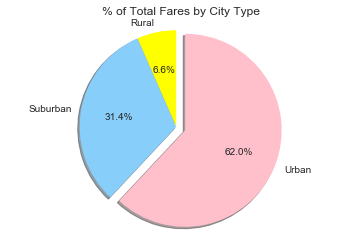

In [39]:
#set color of the piechart Yello, Light Sky Blue, and Pink
colors = ["yellow","lightskyblue","pink"]
#set to explode Urban
explode = (0,0,0.1)
#plot pie chart
plt.pie(type_city_fare["fare"], explode=explode, labels=type_city_fare["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

In [24]:
#% of Total Rides by City Type
type_total_ride = city_sum.pivot_table(index='Type', values='Total Ride', aggfunc=np.sum).reset_index()
type_total_ride.head()

,Type,Total Ride
0,Rural,125
1,Suburban,657
2,Urban,1625


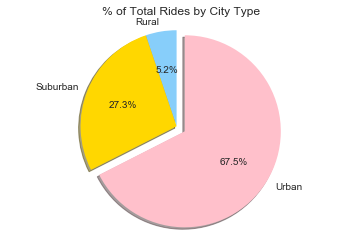

In [41]:
#plot piechart
#Set colors
colors1 = ["lightskyblue","gold","pink"]
plt.pie(type_total_ride["Total Ride"], explode=explode, labels=type_total_ride["Type"], colors=colors1,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

In [25]:
#% of Total Drivers by City Type
type_driver_count = city_sum.pivot_table(index='Type', values='Driver Count', aggfunc=np.sum).reset_index()
type_driver_count.head()

,Type,Driver Count
0,Rural,104
1,Suburban,635
2,Urban,2607


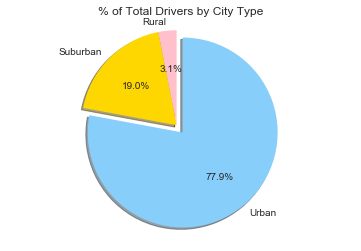

In [43]:
#Set colors
colors2 = ["pink","gold","lightskyblue"]
plt.pie(type_driver_count["Driver Count"], explode=explode, labels=type_driver_count["Type"], colors=colors2,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()